In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14744\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# csv 경로 지정
csv_path = "archive/NFLX.csv"

# ['Date', 'Open', 'High', 'Low', 'Close'] 필드만 읽어오도록
df_A = pd.read_csv(csv_path, encoding='cp949', usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# 데이터 읽어오기 출력
df_A

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [6]:
df_B = pd.read_csv(csv_path, encoding='cp949', usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# to.datetime => 데이터 타입 변경
df_B['Date'] = pd.to_datetime(df_B['Date'])

# 2021년 이후 데이터 필터링
df_after_2021 = df_B[df_B['Date'] >= "2021-01-01"]


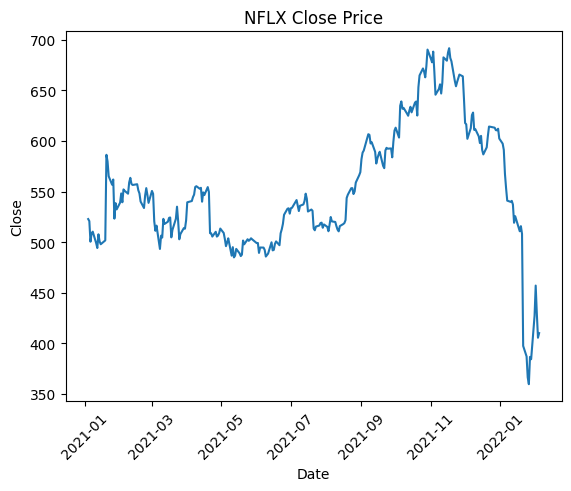

In [7]:
# plot => x: date, y: 종가
plt.plot(df_after_2021['Date'], df_after_2021['Close'])
# 제목
plt.title('NFLX Close Price')
# x, y 축 이름
plt.xlabel('Date')
plt.ylabel('Close')
# x축 가시성 향상
plt.xticks(rotation=45)
# plot 출력
plt.show()

In [8]:
# 최고, 최저 종가 데이터 추출
max_price = df_after_2021['Close'].max()
min_price = df_after_2021['Close'].min()

print('최고 종가:', max_price)
print('최저 종가:', min_price)

최고 종가: 691.690002
최저 종가: 359.700012


In [9]:
# 연-월 기준으로 평균 종가 그룹화
df_monthly_count = df_after_2021.groupby(df_after_2021['Date'].dt.strftime("%Y-%m")).mean()


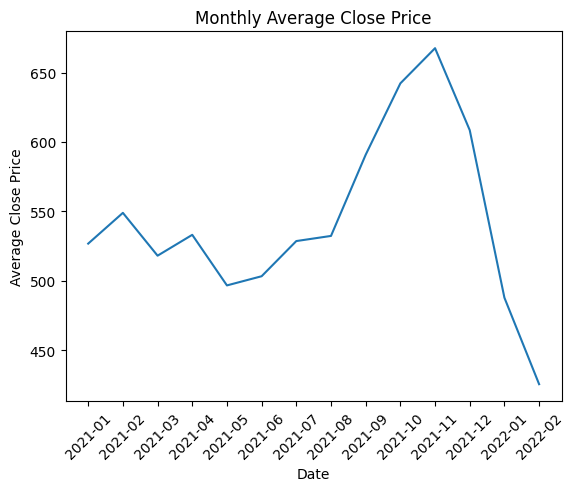

In [10]:
# plot 설정 및 출력
plt.plot(df_monthly_count.loc[:, 'Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.show()

In [11]:
df_E = pd.read_csv(csv_path, encoding='cp949', usecols=['Date', 'Open', 'High', 'Low', 'Close'])
df_E['Date'] = pd.to_datetime(df_E['Date'])

# 2022년 이후 데이터로 필터링
df_after_2022 = df_B[df_B['Date'] >= "2022-01-01"]


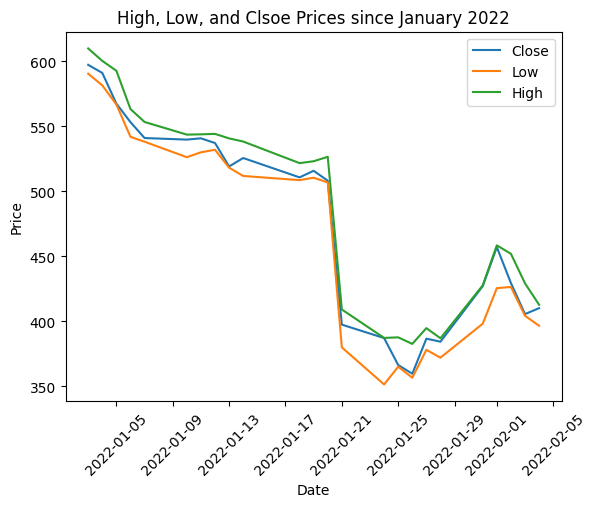

In [12]:
# 다중 plot 설정 및 출력
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')
plt.title('High, Low, and Clsoe Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()